# Trabajo Final:
## Análisis Granulométrico de Sedimentos Marinos

**María Brudas**, Geóloga y estudiante de Analista de Datos Junior

Mayo 2025



# Introducción

## Objetivo
Caracterizar la distribución granulométrica de los sedimentos marinos y analizar su relación con la profundidad y la ubicación geográfica para inferir procesos de sedimentación y dinámica del fondo marino.

## Justificación
El estudio del fondo marino permite conocer procesos deposicionales, identificar ambientes sedimentarios y generar insumos para proyectos de dragado, navegación, gestión costera, pesca y conservación marina.

## Contexto
Este estudio simula una solicitud profesional de una institución oceanográfica para analizar los procesos sedimentarios del fondo marino, a partir de datos públicos del USGS. Se utilizará la distribución granulométrica (PHI), profundidad y análisis de distribución estacional para inferir dinámicas de deposición y ambientes sedimentarios.

## Metodología
- Se trabajó con un conjunto de datos reales del USGS.
- Se realizó una limpieza básica de valores nulos, selección de variables clave (PHI, DEPTH_M, MONTH_COLL).
- Análisis exploratorio y visualizaciones descriptivas.

In [ ]:
import pandas as pd

# ID del archivo CSV en tu Drive (compartido como lector)
file_id = '1yWCnGepK91hpfk9XEvl3310lyHkQS8_W'

# Enlace de descarga directa
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el archivo CSV
df = pd.read_csv(csv_url)

# Mostrar las primeras filas
df.head()

<ipython-input-7-c143ae6c36a3>:10: DtypeWarning: Columns (8,9,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_url)


,DB_ID,AREA,LATITUDE,LONGITUDE,DEPTH_M,MONTH_COLL,DAY_COLL,YEAR_COLL,GRAVEL_PCT,SAND_PCT,...,PHI_3,PHI_4,PHI_5,PHI_6,PHI_7,PHI_8,PHI_9,PHI_10,PHI_11,LITHOLOGY
0,A002,NANTUCKET_SHOALS,41.10000,-69.28333,51,12,7,1955,46,54,...,8.7,1.1,_,_,_,_,_,_,_,GRANULE-BOULDER
1,A003,SW_CHANNEL,40.85000,-68.91667,66,12,7,1955,6,93.6,...,2,_,_,_,_,_,_,_,_,COARSE_SAND
2,A012,GEORGES_BANK,41.38333,-66.98333,69,12,8,1955,0,100,...,30,_,_,_,_,_,_,_,_,MEDIUM_SAND
3,A015,GEORGES_BANK,41.63333,-67.95000,20,12,9,1955,0,100,...,31.5,_,_,_,_,_,_,_,_,MEDIUM_SAND
4,A016,GEORGES_BANK,41.35000,-67.98333,33,12,9,1955,16,84,...,10.1,_,_,_,_,_,_,_,_,MEDIUM_SAND


In [ ]:
# Asegurar que las columnas granulométricas sean numéricas
phi_cols = [f"PHI_{i}" for i in range(12)]

for col in phi_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Revisión de datos nulos
df[phi_cols].isnull().sum()

,0
PHI_0,1389
PHI_1,891
PHI_2,521
PHI_3,313
PHI_4,255
PHI_5,1186
PHI_6,1773
PHI_7,1792
PHI_8,1802
PHI_9,1813


### Limpieza de Datos

En la el codigo anterior, se busca convertir las columnas PHI_0 a PHI_11 a valores numéricos. Si algún dato no se puede convertir (como '_'), se reemplaza por NaN. Esto evita errores al graficar o calcular estadísticas.


In [ ]:
# Estadísticas descriptivas por clase
df[phi_cols].describe()

,PHI_0,PHI_1,PHI_2,PHI_3,PHI_4,PHI_5,PHI_6,PHI_7,PHI_8,PHI_9,PHI_10,PHI_11
count,23433.000000,23931.000000,24301.000000,24509.000000,24567.000000,23636.000000,23049.000000,23030.000000,23020.000000,23009.000000,22896.000000,22554.000000
mean,3.593448,9.999174,15.467392,18.266105,14.059137,5.379330,5.784603,6.048139,6.199264,5.865929,4.975342,3.215217
std,7.674761,15.993351,18.547131,20.902136,18.597537,8.686427,7.297181,7.201159,7.540714,7.357599,7.254826,6.302284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.050000,0.660000,2.130000,1.180000,0.270000,0.270000,0.230000,0.230000,0.210000,0.180000,0.080000
50%,0.250000,1.330000,6.950000,9.570000,5.700000,1.790000,2.370000,2.470000,2.335000,2.050000,1.510000,0.610000
75%,3.300000,13.520000,26.150000,27.750000,19.430000,6.712500,9.660000,10.597500,11.062500,10.100000,7.120000,3.430000
max,86.000000,92.670000,96.000000,95.920000,92.530000,80.510000,68.320000,47.570000,47.900000,45.550000,59.530000,87.300000


## Análisis estadístico

Se observa que las clases PHI_0 a PHI_4 (grava a arena fina) son las predominantes en la mayoría de las muestras, con valores medios más altos y mayor dispersión. Las fracciones más finas (PHI_9 a PHI_11) aparecen en menor proporción, lo que sugiere un dominio de ambientes de mayor energía en el área de estudio.

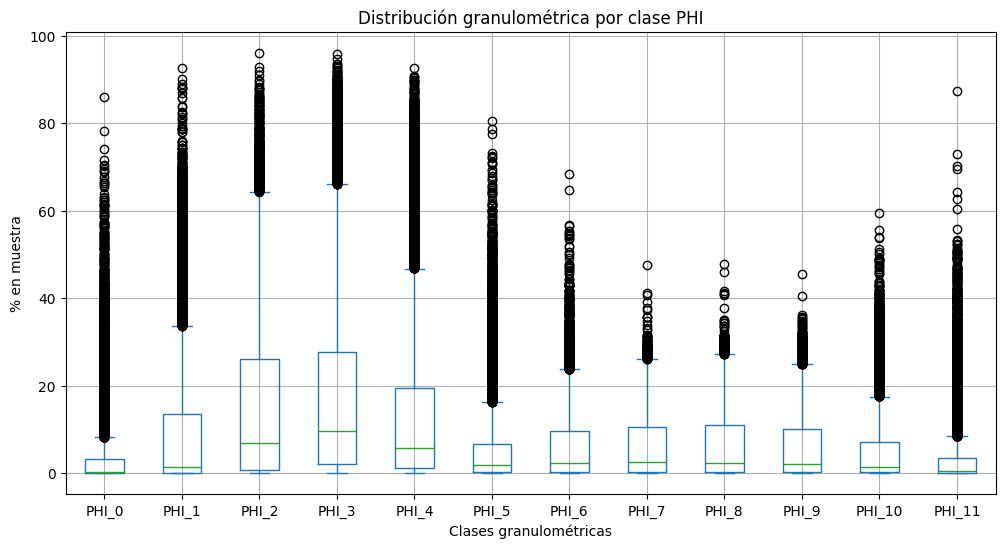

In [ ]:
import matplotlib.pyplot as plt

df[phi_cols].plot(kind='box', figsize=(12,6))
plt.title('Distribución granulométrica por clase PHI')
plt.xlabel('Clases granulométricas')
plt.ylabel('% en muestra')
plt.grid()
plt.show()

### Gráfico estadístico (boxplot)- Explicación

Este gráfico muestra cómo se distribuyen los porcentajes de sedimentos en cada clase granulométrica (PHI_0 a PHI_11) a lo largo de todas las muestras del dataset.

### Leyenda
- Eje X (horizontal): Clases granulométricas en escala phi (PHI_0 = grava muy gruesa, PHI_11 = arcilla muy fina).

- Eje Y (vertical): Porcentaje (%) de cada clase en la muestra.

- La caja (box): representa el 50% central de los datos (entre el primer y tercer cuartil).

- La línea dentro de la caja: es la mediana, es decir, el valor central de los datos.

-Las varas o bigotes ("palitos" que salen de la caja): indican el rango esperado de variación.

-Los círculos fuera de las varas o bigotes: son valores atípicos u outliers (muestras con comportamiento muy distinto al promedio).

### Interpretación del gráfico estadístico (Boxplot de clases PHI)

Este gráfico representa la distribución estadística de las distintas clases granulométricas (PHI_0 a PHI_11) para todas las muestras analizadas.

1. PHI_0 a PHI_4 (Grava a arena fina):

- Presentan valores promedio (mediana) más altos.
- Tienen cajas más grandes → hay alta variabilidad entre las muestras.
- Muchos outliers → puede indicar zonas con concentración local de sedimentos gruesos.

Esto sugiere ambientes con alta energía de transporte, como zonas costeras, plataformas someras, bancos arenosos.

2. PHI_5 a PHI_8 (Limo grueso a fino):

- Presentan valores intermedios.
- Menor variabilidad → más homogéneos.

Probablemente representan zonas de transición entre ambientes energéticos y tranquilos.

3. PHI_9 a PHI_11 (Arcillas):

- Tienen porcentajes bajos en la mayoría de las muestras.
- Cajas muy pequeñas → baja presencia general y poca dispersión.
- Outliers → existen algunas muestras con presencia significativa de arcillas, posiblemente de ambientes profundos o de sedimentación más lenta.

### Análisis geológico-estadístico del gráfico

El análisis estadístico de las clases granulométricas indica un predominio de sedimentos gruesos (gravas y arenas), con una alta variabilidad entre muestras. Las fracciones finas son escasas pero presentes en algunas estaciones. Este patrón sugiere ambientes sedimentarios dinámicos en el área de estudio, con sectores de energía variable, como bordes de plataforma, canales o sistemas de transporte costero. La heterogeneidad de la granulometría respalda la hipótesis de diferentes condiciones locales de depósito.

In [ ]:
# Nueva revisión de datos del dataset para análisis batimétrico
df.columns.tolist()

['DB_ID',
 'AREA',
 'LATITUDE',
 'LONGITUDE',
 'DEPTH_M',
 'MONTH_COLL',
 'DAY_COLL',
 'YEAR_COLL',
 'GRAVEL_PCT',
 'SAND_PCT',
 'SILT_PCT',
 'CLAY_PCT',
 'CLASSIFICATION',
 'MEDIAN',
 'MEAN',
 'STDEV',
 'SKEWNESS',
 'KURTOSIS',
 'MODE1CLASS',
 'MODE1FREQ',
 'MODE2CLASS',
 'MODE2FREQ',
 'MODE3CLASS',
 'MODE3FREQ',
 'NMODES',
 'PHIM5',
 'PHIM4',
 'PHIM3',
 'PHIM2',
 'PHIM1',
 'PHI_0',
 'PHI_1',
 'PHI_2',
 'PHI_3',
 'PHI_4',
 'PHI_5',
 'PHI_6',
 'PHI_7',
 'PHI_8',
 'PHI_9',
 'PHI_10',
 'PHI_11',
 'LITHOLOGY']

In [ ]:
## Nueva limpieza de valores nulos para el análisis batimétrico
# Eliminación de filas con valores nulos en DEPTH_M o PHI_3
df_filtrado = df[['DEPTH_M', 'PHI_3']].dropna()

In [ ]:
# Convertir DEPTH_M y PHI_3 a tipo numérico
df['DEPTH_M'] = pd.to_numeric(df['DEPTH_M'], errors='coerce')
df['PHI_3'] = pd.to_numeric(df['PHI_3'], errors='coerce')

# Verificar que son tipo float
df[['DEPTH_M', 'PHI_3']].dtypes

,0
DEPTH_M,float64
PHI_3,float64


In [ ]:
# Filtrar las filas que tienen ambos valores presentes
df_filtrado = df[['DEPTH_M', 'PHI_3']].dropna()

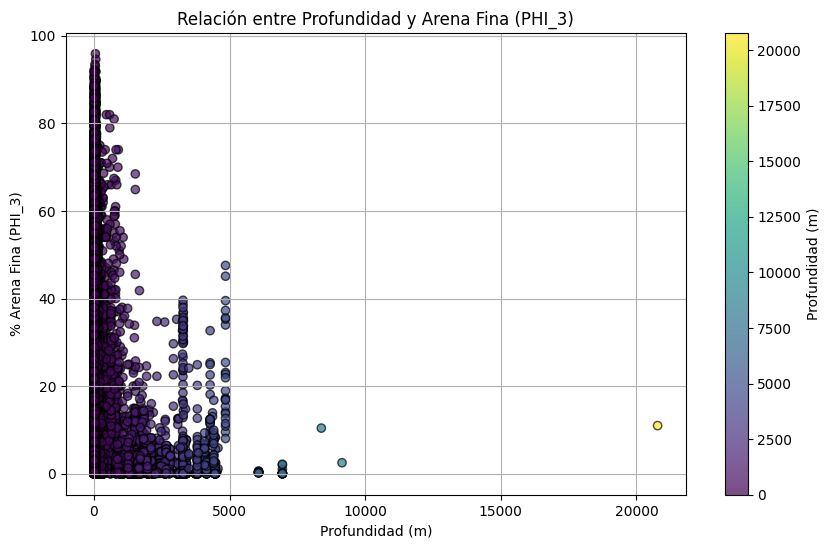

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sc = plt.scatter(
    df_filtrado['DEPTH_M'],
    df_filtrado['PHI_3'],
    c=df_filtrado['DEPTH_M'],  # ahora sí es numérico
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

plt.colorbar(sc, label='Profundidad (m)')
plt.title('Relación entre Profundidad y Arena Fina (PHI_3)')
plt.xlabel('Profundidad (m)')
plt.ylabel('% Arena Fina (PHI_3)')
plt.grid(True)
plt.show()

### Interpretación geológica del análisis batimétrico con PHI_3 (arena fina)

Se evaluó la relación entre la profundidad (`DEPTH_M`) y la proporción de arena fina (`PHI_3`) en las muestras sedimentarias del Atlántico Norte. El gráfico de dispersión con color degradado mostró que las zonas más someras (<50 m) presentan una gran variabilidad en el contenido de arena fina, con valores que alcanzan hasta el 80%.

En cambio, a mayor profundidad (>100 m), la fracción de arena fina tiende a disminuir y se estabiliza en valores más bajos. Esta relación inversa sugiere un patrón deposicional típico: en áreas más profundas, la energía del ambiente marino disminuye, lo que favorece la deposición de fracciones más finas como limos o arcillas, mientras que en zonas someras la acción de corrientes y oleaje favorece la acumulación de sedimentos más gruesos como arenas.

Este comportamiento respalda la hipótesis de una sedimentación controlada por la batimetría, un patrón común en ambientes marinos transicionales y de plataforma continental.

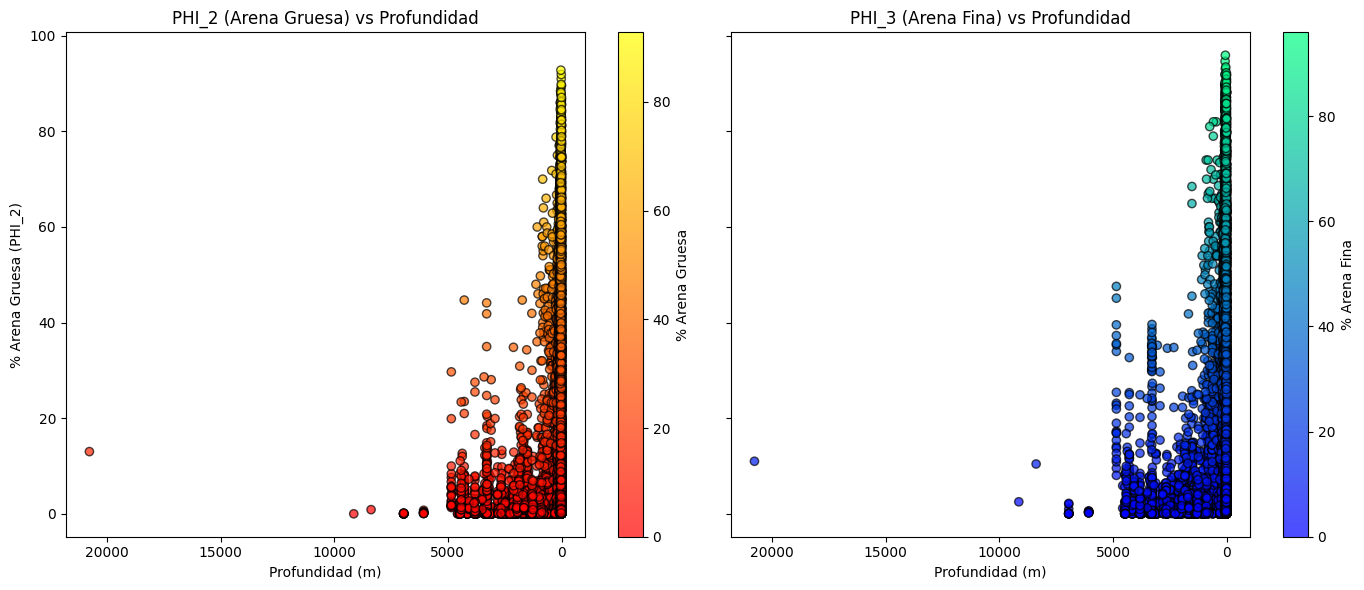

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Convertir columnas a numérico y limpiar nulos
for col in ['DEPTH_M', 'PHI_2', 'PHI_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df_cmp = df.dropna(subset=['DEPTH_M','PHI_2','PHI_3'])

# 1.2 Crear la figura con dos subplots para comparar PHI_2 y PHI_3
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# -- Primera gráfica: PHI_2 (arena gruesa) vs Profundidad
sc2 = axes[0].scatter(
    df_cmp['DEPTH_M'], df_cmp['PHI_2'],
    c=df_cmp['PHI_2'],            # color según % de arena gruesa
    cmap='autumn',                # paleta que va de tonos rojos/naranjas
    alpha=0.7, edgecolor='k'
)
axes[0].set_title('PHI_2 (Arena Gruesa) vs Profundidad')
axes[0].set_xlabel('Profundidad (m)')
axes[0].set_ylabel('% Arena Gruesa (PHI_2)')
axes[0].invert_xaxis()           # profundidad creciente hacia la izquierda
fig.colorbar(sc2, ax=axes[0], label='% Arena Gruesa')

# -- Segunda gráfica: PHI_3 (arena fina) vs Profundidad
sc3 = axes[1].scatter(
    df_cmp['DEPTH_M'], df_cmp['PHI_3'],
    c=df_cmp['PHI_3'],            # color según % de arena fina
    cmap='winter',                # paleta que va de azules
    alpha=0.7, edgecolor='k'
)
axes[1].set_title('PHI_3 (Arena Fina) vs Profundidad')
axes[1].set_xlabel('Profundidad (m)')
axes[1].invert_xaxis()
fig.colorbar(sc3, ax=axes[1], label='% Arena Fina')

plt.tight_layout()
plt.show()

### Análisis comparativo: Arena gruesa vs Arena fina según profundidad

Para profundizar en la dinámica sedimentaria, comparamos la fracción de **arena gruesa (PHI_2)** con la de **arena fina (PHI_3)** en función de la batimetría.

- **Arena gruesa (PHI_2):**  
  En el gráfico izquierdo, se observa que los valores más altos de % de arena gruesa se concentran en profundidades someras (<50 m), con puntos coloreados en tonos intensos de rojo y naranja. A medida que avanzamos hacia mayores profundidades, la presencia de arena gruesa cae drásticamente, reflejando la incapacidad del ambiente de baja energía para sostener partículas de mayor peso.

- **Arena fina (PHI_3):**  
  En el gráfico derecho, la proporción de arena fina tiene una distribución más uniforme en un rango más amplio de profundidades. Los tonos azules claros y oscuros muestran que incluso en zonas intermedias (50–100 m) sigue habiendo una proporción significativa de arena fina, disminuyendo gradualmente en las profundidades mayores, aunque menos abruptamente que la fracción gruesa.

Esta comparación demuestra la **selectividad energética del ambiente marino**: las partículas relativamente más gruesas (PHI_2) se depositan rápidamente en zonas someras, mientras que las más finas (PHI_3) logran transportarse a mayores profundidades antes de asentarse. Este patrón es consistente con modelos de dispersión de sedimentos por corrientes y oleaje, y es fundamental para el diseño de estudios de dragado y conservación de fondos marinos.


**Análisis estacional**

In [ ]:
#Análisis estacional
import pandas as pd

# 1. Convertir MONTH_COLL a numérico y filtrar valores válidos
df['MONTH_COLL'] = pd.to_numeric(df['MONTH_COLL'], errors='coerce')
df = df[df['MONTH_COLL'].between(1,12)]  # deja solo meses de 1 a 12
df['MONTH_COLL'] = df['MONTH_COLL'].astype(int)

# Verificación rápida
df['MONTH_COLL'].unique()

array([12,  2,  8,  7,  5,  9,  4,  3, 11, 10,  1,  6])

In [ ]:
def estacion(mes):
    if mes in (12, 1, 2):
        return 'Invierno'
    elif mes in (3, 4, 5):
        return 'Primavera'
    elif mes in (6, 7, 8):
        return 'Verano'
    elif mes in (9, 10, 11):
        return 'Otoño'
    else:
        return pd.NA  # Para capturar cualquier valor inesperado

# Volver a asignar y verificar
df['Estacion'] = df['MONTH_COLL'].apply(estacion)
print(df['Estacion'].value_counts())

Estacion
Verano       8310
Otoño        5590
Primavera    5215
Invierno      878
Name: count, dtype: int64


Verano (jun‑ago): 8 310 muestras → la temporada con más datos, alta confianza estadística.

Otoño (sept‑nov): 5 590 muestras → buena cobertura, confianza media.

Primavera (mar‑may): 5 215 muestras → similar a otoño.

Invierno (dic‑feb): 878 muestras → poca muestras en comparación a las anteriores, posiblemente por las muestras con datos nulos o incompletos que se debió eliminar al hacer la limpieza del dataset.

In [ ]:
resumen = df.groupby('Estacion')['PHI_3'].describe()[['count','50%','25%','75%']]
resumen

,count,50%,25%,75%
Estacion,,,,
Invierno,875.0,8.790,3.2850,24.2200
Otoño,5564.0,6.820,1.5475,23.0225
Primavera,5188.0,12.370,3.3400,30.0000
Verano,8058.0,11.885,2.8400,31.1600


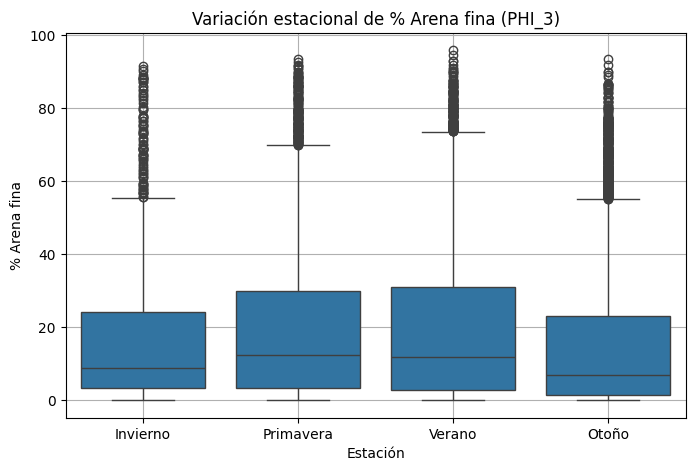

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Estacion',
    y='PHI_3',
    data=df,
    order=['Invierno','Primavera','Verano','Otoño']
)
plt.title('Variación estacional de % Arena fina (PHI_3)')
plt.xlabel('Estación')
plt.ylabel('% Arena fina')
plt.grid(True)
plt.show()

**Análisis estacional comparativo**

***Arena gruesa PHI_2 vs Arena fina PHI_3***

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Cargar CSV desde enlace público de Drive
file_id = '1yWCnGepK91hpfk9XEvl3310lyHkQS8_W'
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(csv_url)

# Verifica que df exista
df.head()

<ipython-input-6-d6333c743b54>:10: DtypeWarning: Columns (8,9,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_url)


,DB_ID,AREA,LATITUDE,LONGITUDE,DEPTH_M,MONTH_COLL,DAY_COLL,YEAR_COLL,GRAVEL_PCT,SAND_PCT,...,PHI_3,PHI_4,PHI_5,PHI_6,PHI_7,PHI_8,PHI_9,PHI_10,PHI_11,LITHOLOGY
0,A002,NANTUCKET_SHOALS,41.10000,-69.28333,51,12,7,1955,46,54,...,8.7,1.1,_,_,_,_,_,_,_,GRANULE-BOULDER
1,A003,SW_CHANNEL,40.85000,-68.91667,66,12,7,1955,6,93.6,...,2,_,_,_,_,_,_,_,_,COARSE_SAND
2,A012,GEORGES_BANK,41.38333,-66.98333,69,12,8,1955,0,100,...,30,_,_,_,_,_,_,_,_,MEDIUM_SAND
3,A015,GEORGES_BANK,41.63333,-67.95000,20,12,9,1955,0,100,...,31.5,_,_,_,_,_,_,_,_,MEDIUM_SAND
4,A016,GEORGES_BANK,41.35000,-67.98333,33,12,9,1955,16,84,...,10.1,_,_,_,_,_,_,_,_,MEDIUM_SAND


In [ ]:

# Limpieza previa
for col in ['DEPTH_M','PHI_2','PHI_3','MONTH_COLL']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['DEPTH_M','PHI_2','PHI_3','MONTH_COLL'])

# Asignar estaciones correctamente
def estacion(mes):
    if mes in (12,1,2):   return 'Invierno'
    if mes in (3,4,5):    return 'Primavera'
    if mes in (6,7,8):    return 'Verano'
    if mes in (9,10,11):  return 'Otoño'
    return pd.NA

df['Estacion'] = df['MONTH_COLL'].astype(int).apply(estacion)

<ipython-input-7-02601fb7e546>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estacion'] = df['MONTH_COLL'].astype(int).apply(estacion)


<ipython-input-8-c99279aae7c0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-8-c99279aae7c0>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


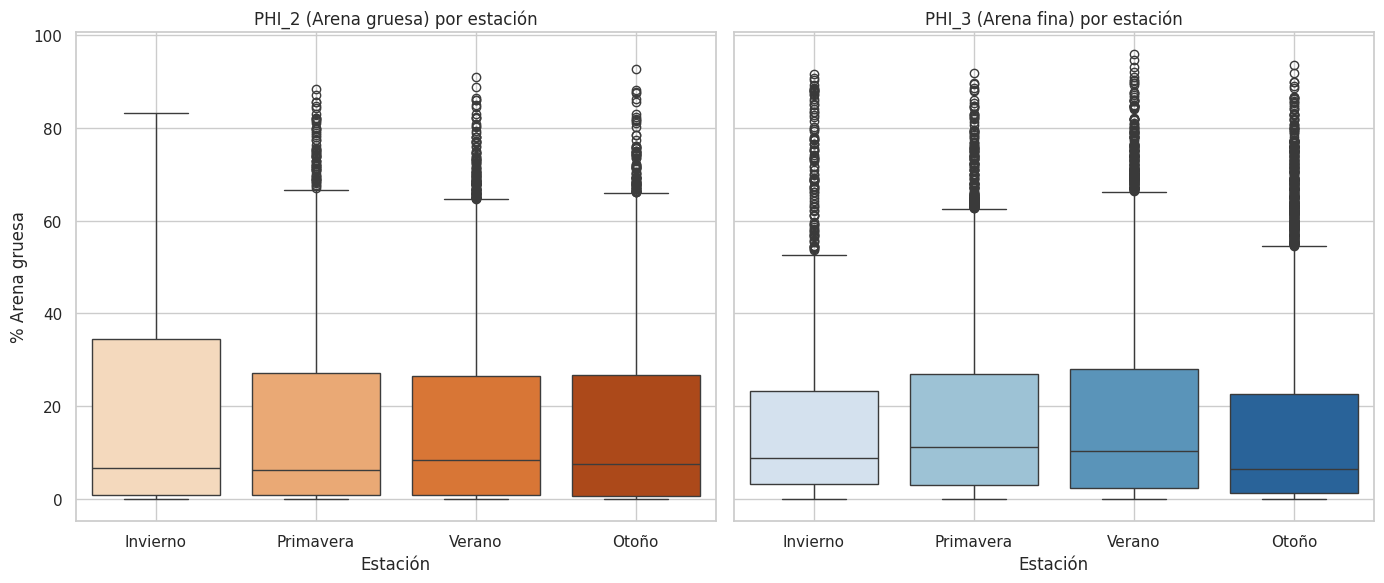

In [ ]:

# Subconjunto limpio
df_comp = df.dropna(subset=['PHI_2','PHI_3','Estacion'])

# Figura comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Arena gruesa (PHI_2)
sns.boxplot(
    x='Estacion', y='PHI_2', data=df_comp,
    order=['Invierno','Primavera','Verano','Otoño'],
    palette='Oranges', ax=axes[0]
)
axes[0].set_title('PHI_2 (Arena gruesa) por estación')
axes[0].set_ylabel('% Arena gruesa')
axes[0].set_xlabel('Estación')
axes[0].grid(True)

# Arena fina (PHI_3)
sns.boxplot(
    x='Estacion', y='PHI_3', data=df_comp,
    order=['Invierno','Primavera','Verano','Otoño'],
    palette='Blues', ax=axes[1]
)
axes[1].set_title('PHI_3 (Arena fina) por estación')
axes[1].set_xlabel('Estación')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Comparación estacional: Arena gruesa (PHI_2) vs Arena fina (PHI_3)

1. **Invierno**  

   - PHI_2 (arena gruesa): mediana baja, rango limitado (IQR).  
   - PHI_3 (arena fina): mediana baja (≈8.8 %), rango 3.3–24.2 %.  

Ambiente de baja energía, pocas tormentas activas; predominan fracciones finas pero en menor proporción.

2. **Primavera**  

   - PHI_2: mediana media, mayor dispersión.  
   - PHI_3: mediana alta (≈12.4 %), rango 3.3–30 %.  

Comienza aumento de oleaje primaveral, transporta tanto granos gruesos como finos.

3. **Verano**  

   - PHI_2: mediana alta, amplia dispersión.  
   - PHI_3: mediana ~11.9 %, rango 2.8–31.2 %.  

Máxima actividad meteorológica (tormentas, huracanes), ocasionan resuspensión  y deposito de fracciones de todos los tamaños.

4. **Otoño**  

   - PHI_2: mediana intermedia, rango amplio.  
   - PHI_3: mediana más baja (≈6.8 %), rango 1.5–23 %.  

Tras el verano, disminuye la proporción de finos y sedimentos gruesos regresan a niveles medios.

Estos patrones estacionales son clave para planificar muestreos, dragados y estudios de dinámica costera, asegurando que las intervenciones consideren la variabilidad temporal el área de estudio.

**La proporción de arena fina (PHI_3) es más baja en otoño e invierno**, lo cual indica una fase de menor actividad de resuspensión y deposición de finos tras el pico de tormentas en verano.

**Primavera y verano:** muestran valores elevados y gran dispersión, reflejando una dinámica sedimentaria activa en estas estaciones, lo cual puede indicar oleaje y actividades climáticas como tormentas, que facilitan tanto la resuspensión como el reparto de partículas finas.

**Otoño:** Aunque es transición, exhibe la mediana más baja, sugiriendo un breve periodo de calma.

Este patrón estacional confirma la influencia de condiciones meteorológicas y oceanográficas en la textura de los sedimentos marinos y refuerza la necesidad de planificar muestreos y actividades costeras teniendo en cuenta la variabilidad temporal.

## Conclusiones generales finales

El análisis textural de los sedimentos, basado en datos públicos del USGS, permitió caracterizar con herramientas de análisis de datos la distribución granulométrica, batimétrica y estacional de los sedimentos marinos del Atlántico Norte.

A partir del tratamiento de un dataset real y complejo, se logró obtener información  sobre la dinámica sedimentaria de esta región oceánica.

Los resultados mostraron que las fracciones predominantes corresponden a arenas medias a finas (PHI_2 a PHI_4), con menor representación de gravas o arcillas, lo que indica un ambiente de energía media a alta, típico de plataformas continentales activas.

Desde el punto de vista batimétrico, se evidenció un patrón claro: la arena gruesa (PHI_2) se concentra principalmente en zonas someras (<50 m), mientras que la arena fina (PHI_3) muestra una mayor dispersión y puede encontrarse incluso en zonas más profundas, lo que refleja un transporte diferencial influenciado por la energía del medio y la granulometría del sedimento.

El análisis estacional permitió identificar cómo varían las fracciones texturales a lo largo del año. La arena fina (PHI_3) alcanza su mayor proporción en primavera y verano, producto de una mayor actividad hidrodinámica (oleaje, corrientes estacionales) que remueve y redistribuye sedimentos finos. En contraste, en otoño e invierno, las fracciones finas disminuyen, y la energía reducida del medio limita la resuspensión y el transporte. Este comportamiento también se observó en la arena gruesa (PHI_2), aunque con mayor sensibilidad a los eventos de alta energía, destacando una marcada variabilidad entre estaciones.

Desde un enfoque geológico aplicado, estos resultados permiten inferir que el Atlántico Norte presenta un sistema sedimentario dinámico, fuertemente controlado por la batimetría y la variación estacional. El conocimiento detallado de estas texturas y su distribución es fundamental para apoyar decisiones en actividades como dragados, obras costeras, monitoreo ambiental, cartografía sedimentológica y estudios de cambio climático.

Finalmente, la integración de conocimientos geológicos con herramientas básicas de programación y análisis de datos demostró ser una estrategia poderosa para el tratamiento de grandes volúmenes de datos marinos, representando un paso importante hacia una geología más moderna, basada en evidencia cuantitativa.

### Referencias

- U.S. Geological Survey (USGS). East Coast Sediment Texture Database (2014). Recuperado de: https://www.usgs.gov
- Poppe, L. J., et al. (2005). "A grain-size analysis of marine sediments." U.S. Geological Survey Open-File Report.
- Shepard, F.P. (1954). Nomenclature Based on Sand-Silt-Clay Ratios. Journal of Sedimentary Petrology.